Saving Disease_symptom_and_patient_profile_dataset.csv to Disease_symptom_and_patient_profile_dataset (2).csv

Original class distribution:
Disease
Asthma               23
Stroke               16
Osteoporosis         14
Diabetes             10
Hypertension         10
                     ..
Schizophrenia         1
Gout                  1
Testicular Cancer     1
Tonsillitis           1
Williams Syndrome     1
Name: count, Length: 116, dtype: int64

Filtered class distribution (classes with >1 sample):
Disease
Asthma                                          23
Stroke                                          16
Osteoporosis                                    14
Migraine                                        10
Diabetes                                        10
Hypertension                                    10
Bronchitis                                       8
Influenza                                        8
Pneumonia                                        8
Hypothyroidism             

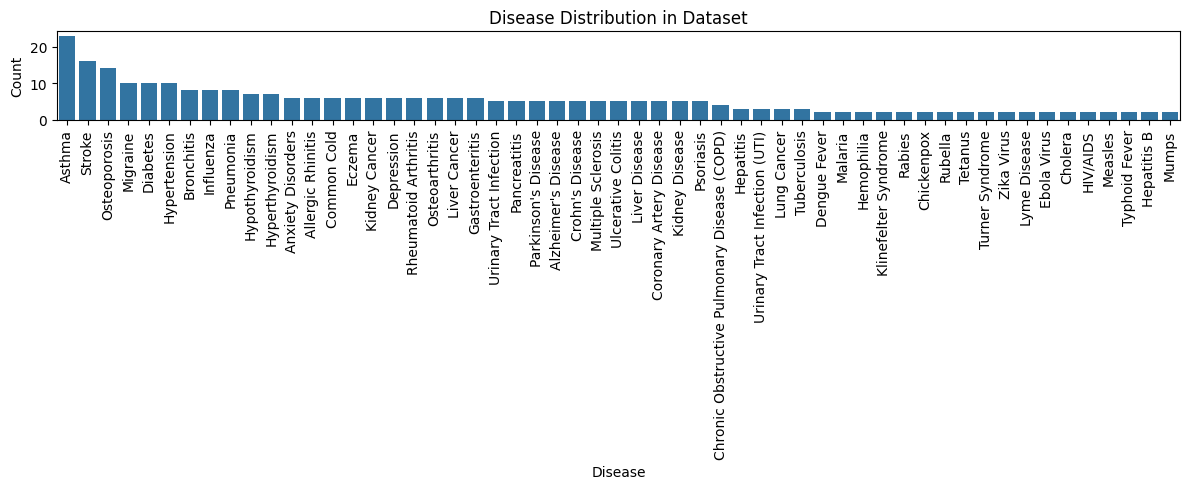


Model Accuracy: 0.34

Confusion Matrix:
 [[0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         1
           3       0.44      0.80      0.57         5
           4       0.25      0.50      0.33         2
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         1
          10       0.33      1.00      0.50         1
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

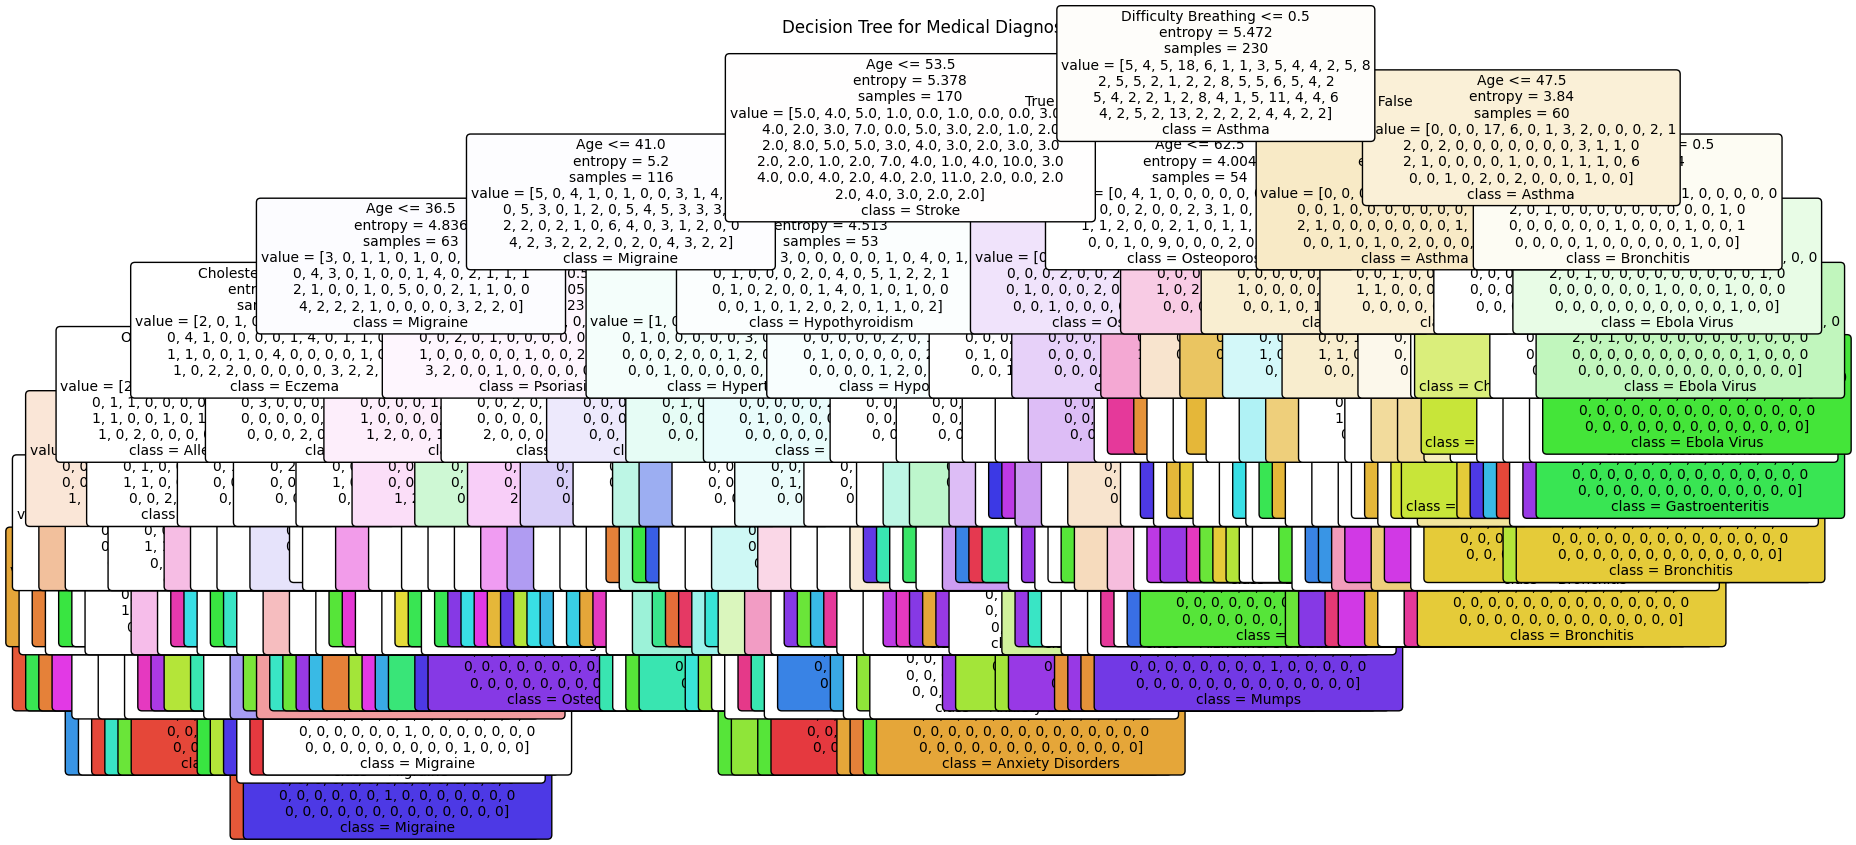


Decision Tree Rules:

|--- Difficulty Breathing <= 0.50
|   |--- Age <= 53.50
|   |   |--- Age <= 41.00
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- Cholesterol Level <= 1.50
|   |   |   |   |   |--- Outcome Variable <= 0.50
|   |   |   |   |   |   |--- Cholesterol Level <= 0.50
|   |   |   |   |   |   |   |--- Fatigue <= 0.50
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |--- Fatigue >  0.50
|   |   |   |   |   |   |   |   |--- Fever <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 53
|   |   |   |   |   |   |   |   |--- Fever >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 16
|   |   |   |   |   |   |--- Cholesterol Level >  0.50
|   |   |   |   |   |   |   |--- Cough <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Cough >  0.50
|   |   |   |   |   |   |   |   |--- Age <= 32.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Age >  32.00
|   |   |   |   |   

<ipython-input-3-118dbb2547d8>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns[indices], y=importances[indices], palette="viridis")


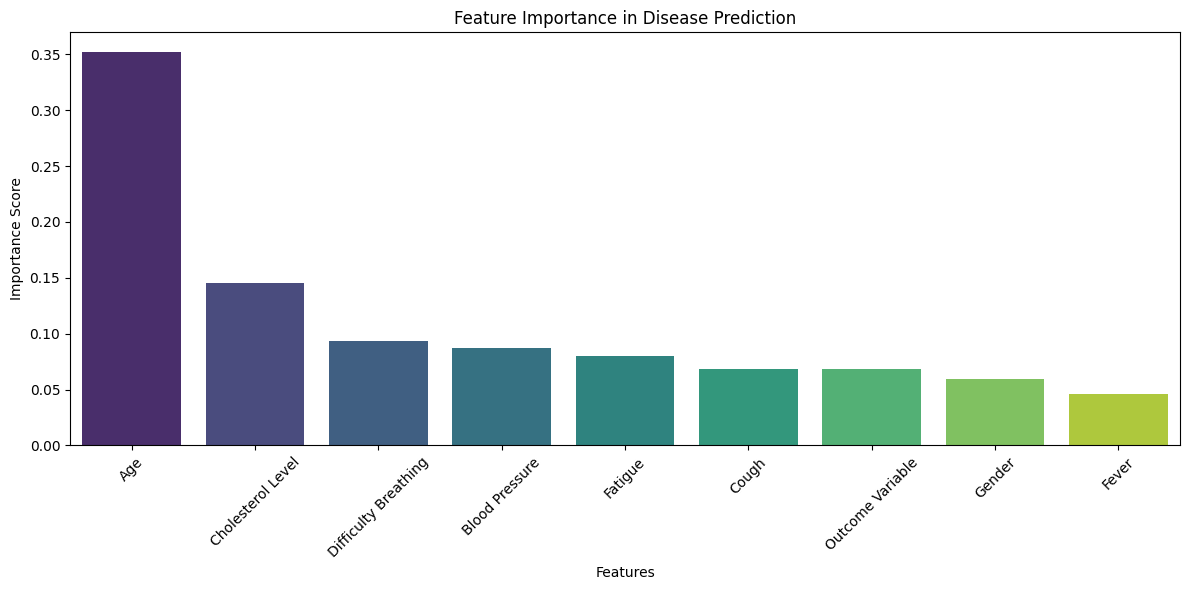

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import files
import numpy as np

# Upload dataset
uploaded = files.upload()

# Load dataset
df = pd.read_csv("Disease_symptom_and_patient_profile_dataset.csv")

# Show class distribution before filtering
print("\nOriginal class distribution:")
print(df["Disease"].value_counts())

# Remove classes with fewer than 2 samples
class_counts = df['Disease'].value_counts()
df = df[df['Disease'].isin(class_counts[class_counts > 1].index)]

# Show class distribution after filtering
print("\nFiltered class distribution (classes with >1 sample):")
print(df["Disease"].value_counts())

# Visualize disease distribution
plt.figure(figsize=(12, 5))
sns.countplot(x='Disease', data=df, order=df['Disease'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Disease Distribution in Dataset")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Encode categorical features
label_encoders = {}
for column in df.columns:
    if df[column].dtype == "object":
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Features and label
X = df.drop("Disease", axis=1)
y = df["Disease"]

# Split the dataset (safe to stratify now)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train the model
model = DecisionTreeClassifier(criterion="entropy", random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    filled=True,
    feature_names=X.columns,
    class_names=label_encoders["Disease"].classes_,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Medical Diagnosis")
plt.show()

# Export rules from the decision tree
tree_rules = export_text(model, feature_names=list(X.columns))
print("\nDecision Tree Rules:\n")
print(tree_rules)

# Feature importance bar chart
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=X.columns[indices], y=importances[indices], palette="viridis")
plt.title("Feature Importance in Disease Prediction")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
